# CA1 Assigment Submission: Part B
<span id="0"></span>
**Author:** Dexter Chew
<br>**Date:** 4th June 2022
<br>**Student ID:** p7414405

### Report Overview
This Notebook is written as a submission report for CA1 Assignment. In the report there will be 3 separate datasets that requires analysis - Part A-C. For this particular report it will be on Datasest A- Titanic Dataset. <br><br> In Part A, I will be analyzing the Titanic Dataset from Kaggle. This is a classification problem to predict whether an individual would have survied the titanic incident. I will be creating a ML pipeline to assess this data. For Part B, I will be analysing the King County dataset and attempt to create a ML model that predicts the housing sales prices. Lastly, for Part C, I will be analyzing my own dataset of interest.

### Objective
To predict predict housing prices using regression.

## Contents Page
- Part B: King County Regression Problem
     1. [Exploratory-Data-Analysis-(EDA)](#1)
     2. [Data Preparation](#2)
     3. [Data Visualization](#3)
     4. [Data Transformation](#4)
     5. [Model Training](#5)
     6. [Score and Evaluate Model](#6)
     7. [Conclusion](#7)


In [1]:
#Generic Packages
import numpy as np
import pandas as pd
import matplotlib
import platform
from matplotlib import pyplot as plt
import seaborn as sns

#Machine Learning Packages
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV #Use GridSearchCV to find the best combination
from sklearn.model_selection import cross_val_score #Use cross validation to find the best params
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

************************
        Versions        
************************
Scikit-learn version=1.0.2
Numpy version=1.20.1
Pandas version=1.2.4
Matplotlib version=3.3.4
Python version=3.8.8


### Data Importing¶

In [2]:
train_datalink = r".\data\king\kc_house_data.csv"
kchousedf = pd.read_csv(train_datalink)
kchousedf.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## <span id="1"></span> 1. Exploratory Data Analysis (EDA)
[Back to Main](#0)

In [3]:
kchousedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
kchousedf.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
kchousedf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


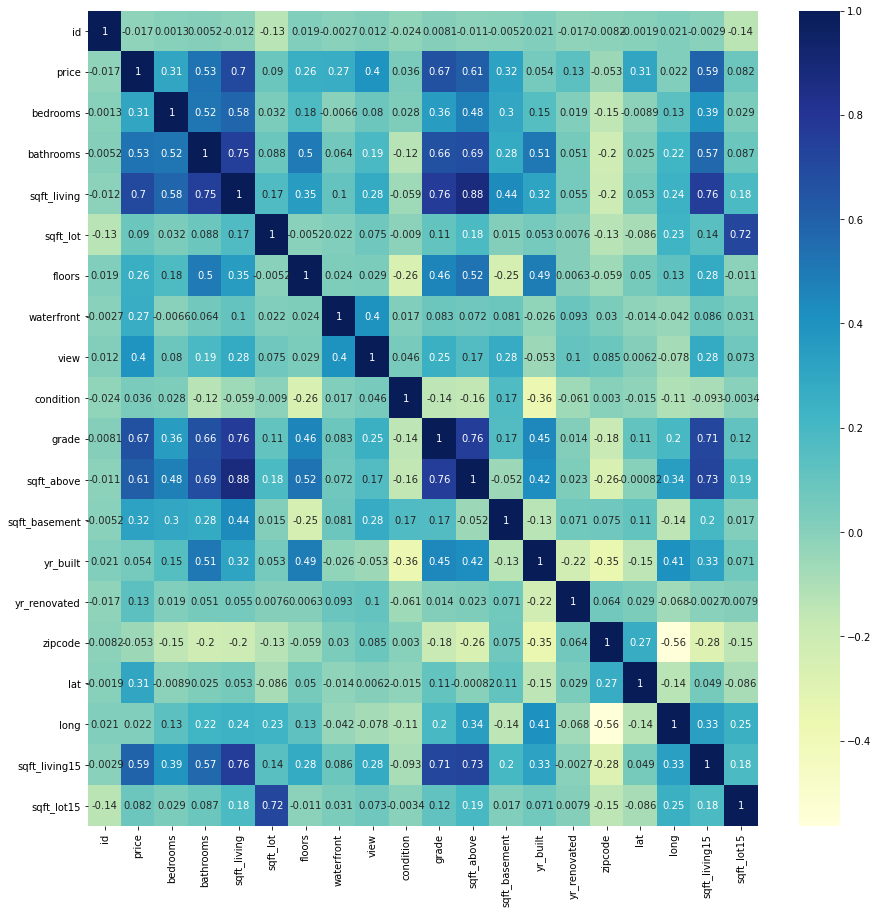

In [6]:
plt.subplots(figsize=(15,15))
corr = kchousedf.corr()
sns.heatmap(corr, cmap="YlGnBu",annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### Comments:
- The data has 21613 entries and 20 predictor variables or features. 
- The predictor variable will be the price of the housing.
- We can notice some observations as detailed in the Data Preparation stack where variables are related to each other in a medium to strong linear relationship fashion as dictated by the high r2 value.

## <span id="2"></span> 2. Data Preparation
[Back to Main](#0)

Most of the data is clean but we need to drop some input columns that
are related to each other (multi-colinearity) for e.g.  
* sqft_living15 (drop) and sqft_above (drop): related to sqft_living  
* sqft_lot15 (drop): related to sqft_lot   
* We will drop the id field because it is a running sequence  
* We will drop the date field because we want to determine the price independent of time

In [7]:
housedf = kchousedf.drop(["id","date","sqft_above","sqft_living15","sqft_lot15"],axis=1)
housedf.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,1530,2001,0,98053,47.6561,-122.005
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,0,1995,0,98003,47.3097,-122.327
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,0,1963,0,98198,47.4095,-122.315
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,730,1960,0,98146,47.5123,-122.337
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,0,2003,0,98038,47.3684,-122.031


## <span id="3"></span> 3. Data Visualization
[Back to Main](#0)

In [8]:
#sns.pairplot(kchousedf)

In [9]:
# Since all values are numeric, do a correction and sort to determine
# the most important features relative to Survived
corr = housedf.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr["price"])

price            1.000000
sqft_living      0.702035
grade            0.667434
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


#### 1. Year of Renovation

Pearsons correlation: 0.128


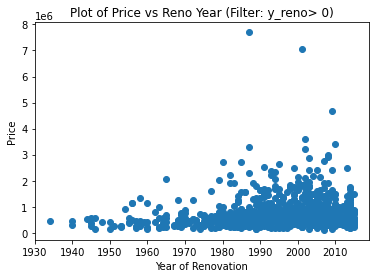

In [10]:
#To filter off the 0 year or no renovation samples for better visualisation on potential relationships
from scipy.stats import pearsonr

filtered_df=housedf[housedf['yr_renovated']>0]
plt.scatter(filtered_df.yr_renovated,filtered_df.price)
plt.ylabel("Price")
plt.xlabel("Year of Renovation")
plt.title("Plot of Price vs Reno Year (Filter: y_reno> 0)")

#Print correlation plots for houses which have been renovated.
corr, _ = pearsonr(filtered_df.yr_renovated, filtered_df.price)
print('Pearsons correlation: %.3f' % corr)

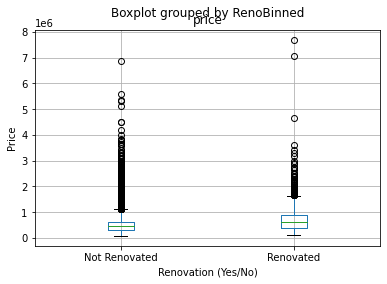

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,RenoBinned
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,Not Renovated
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,Renovated
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,Not Renovated
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,Not Renovated
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,Not Renovated


In [11]:
#Plotting for potential categorical feature for renovation year
#Boxplots: To observe statistical differences
label_names = ["Not Renovated", "Renovated"]
cut_points = [-1,1,99999999999999999] #Binned cut off at 
housedf["RenoBinned"] = pd.cut(housedf["yr_renovated"], cut_points, labels=label_names)
housedf.boxplot(column= 'price',by='RenoBinned')
plt.xlabel("Renovation (Yes/No)")
plt.ylabel("Price")
plt.show()

housedf.head()

In [12]:
#statistical significance test between groups
from scipy import stats
group1 = housedf[housedf["RenoBinned"]=="Not Renovated"].price.values
group2 = housedf[housedf["RenoBinned"]=="Renovated"].price.values
stats.ttest_ind(group1,group2)

Ttest_indResult(statistic=-18.685558808938083, pvalue=2.640148591805521e-77)

#### 2. Waterfront

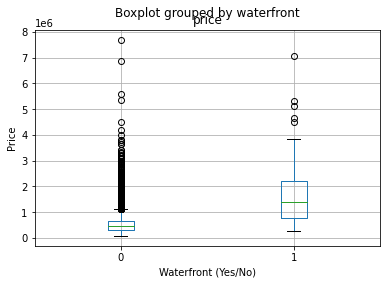

In [13]:
#Plotting for potential categorical feature for renovation year
#Boxplots: To observe statistical differences
housedf.boxplot(column= 'price',by='waterfront')
plt.xlabel("Waterfront (Yes/No)")
plt.ylabel("Price")
plt.show()

In [14]:
#statistical significance test between groups
from scipy import stats
group1 = housedf[housedf["waterfront"]==1].price.values
group2 = housedf[housedf["waterfront"]==0].price.values
stats.ttest_ind(group1,group2)

Ttest_indResult(statistic=40.62589119977304, pvalue=0.0)

In [15]:
 housedf.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'RenoBinned'],
      dtype='object')

<Figure size 1080x864 with 0 Axes>

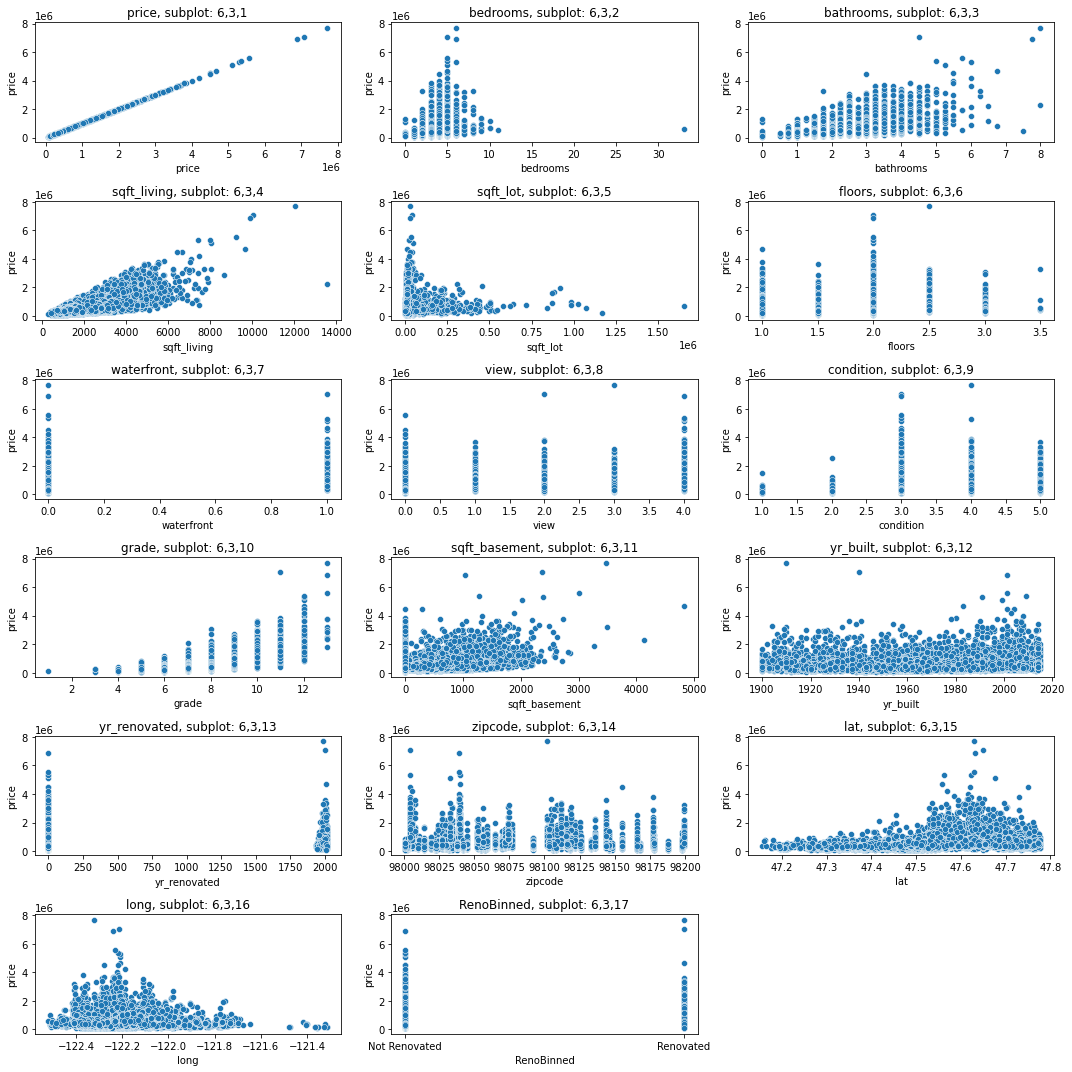

In [16]:
#A closer look at the relationship with price

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Daily closing prices", fontsize=18, y=0.95)

#  Categorical Data
b = 3  # number of columns
a = round(len(housedf.columns)/b)  # number of rows
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in housedf.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(housedf[i],housedf.price)
    c = c + 1

plt.tight_layout()
plt.show()

### Comments
- Notice that all the types are numeric except for date which could be converted into datetime objects for further analysis. Also waterfront variable is actually a categorical variable rather than numeric. While it is already encoded as 0 and 1, it is categorical by nature.
- Also notice that there is a need for standardization of the values due to huge magnitude differences between columns to get a more unbiased weightages to minimize bias.
- Looking at the pairplots for all the numeric variables that are remaining, we can see that relationships (if any) that have moderately strong linear relationship with other variables) exhibits quite a linear fashion.
- Notice that Renobinned compared to correlation matrix, it seemed like cateogrizing whether the flat has been renovated or not has a statisitcally significant differenece (p-value = 0.00 < 0.05).
- Also notice that having a waterfront generally fetches slightly statistically higher price as well (p-value = 0.00 < 0.05)

## Handle missing values

There are no missing values for the Housing data set

## 4. Data transformation
[Back to Main](#0)

- Splitting of renovation year into categorical variable - RenoBinned. To indicate if the houses have been renovated or not (Completed in previous step)
- One Hot Encode the RenoBinned variable and use RobustScalar/StandardScaler to process other numeric variables.
- Potentially drop weakly correlated variables to price (i.e. 0.0x pearson correlation coefficient) like zipcode, longitude, condition, year of built, squarefeet of lot and year renovated to minimize overfitting.

### Function: Generate the feature names post-Column Transformation

In [17]:
#Creating a function to pull features from column transformer in pipeline easily

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

## <span id="5"></span> 5. Train Model¶
[Back to Main](#0)

## Split Data into Train and Test Sets

In [18]:
from sklearn.model_selection import train_test_split

#finaldf = housedf.drop(columns="yr_renovated",axis=1)
finaldf=housedf
finaldf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,RenoBinned
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,Not Renovated
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,Renovated
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,Not Renovated
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,Not Renovated
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,Not Renovated


In [19]:
#Replace year renovated with nan
finaldf.yr_renovated=finaldf.yr_renovated.replace(0, np.nan)
finaldf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,RenoBinned
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,NaN,98178,47.5112,-122.257,Not Renovated
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991.0,98125,47.7210,-122.319,Renovated
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,NaN,98028,47.7379,-122.233,Not Renovated
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,NaN,98136,47.5208,-122.393,Not Renovated
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,NaN,98074,47.6168,-122.045,Not Renovated


In [20]:
#Simple imputer
y = finaldf["price"]
X = finaldf.drop(["price"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,RenoBinned
20046,3,2.50,2480,4136,2.0,0,0,3,8,0,2009,NaN,98059,47.4930,-122.147,Not Renovated
7278,3,2.50,2060,10650,1.0,0,0,5,8,1010,1976,NaN,98006,47.5627,-122.137,Not Renovated
13226,4,2.50,2800,6567,2.0,0,0,3,9,0,2006,NaN,98038,47.3555,-122.002,Not Renovated
6832,4,2.50,1950,5602,1.0,0,0,5,7,830,1966,NaN,98118,47.5437,-122.291,Not Renovated
21131,4,2.75,3030,6625,2.0,0,0,3,8,0,2011,NaN,98059,47.4815,-122.152,Not Renovated


In [21]:
y_train

20046    498000.0
7278     700000.0
13226    459950.0
6832     428000.0
21131    525000.0
           ...   
919      290000.0
20691    499950.0
5699     770000.0
10742    745000.0
16921    353000.0
Name: price, Length: 17290, dtype: float64

In [22]:
print("Training Set Size: {}".format(np.shape(X_train)))
print("Test Set Size: {}".format(np.shape(X_test)))

Training Set Size: (17290, 16)
Test Set Size: (4323, 16)


### Pipeline

In [23]:
from sklearn.impute import SimpleImputer
from sklearn import set_config

#1. Identifying columns to process
numfeat = finaldf.columns.drop(["RenoBinned","waterfront","price"])
catfeat = ["RenoBinned","waterfront"]

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan,strategy='mean')), ("scaler", RobustScaler())]
)
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#2. Creating the model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numfeat),
        ("cat", categorical_transformer, catfeat),
    ], remainder = 'passthrough'
)


### Pipeline-Preprocessing Transformation Check

In [24]:
#3. Pipeline Pre-Processor Check
print("Numerical Features: {}".format(numfeat))
print(np.size(numfeat))
print("Categorical Features: {}".format(catfeat))
print(np.size(catfeat))

x_values=preprocessor.fit_transform(X_train)
columns = get_feature_names(preprocessor)
xdf = pd.DataFrame(data = x_values, columns = columns)
print(xdf.describe())
xdf.head()
print(xdf.isnull().sum())

Numerical Features: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')
14
Categorical Features: ['RenoBinned', 'waterfront']
2
       num__bedrooms  num__bathrooms  num__sqft_living  num__sqft_lot  \
count   17290.000000    17290.000000      17290.000000   17290.000000   
mean        0.374089       -0.177926          0.146405       1.306486   
std         0.936048        1.026574          0.815432       6.952999   
min        -3.000000       -3.000000         -1.442478      -1.265597   
25%         0.000000       -0.666667         -0.433628      -0.459893   
50%         0.000000        0.000000          0.000000       0.000000   
75%         1.000000        0.333333          0.566372       0.540107   
max        30.000000        7.666667         10.283186     206.269875   

        num__floors     num__view  num__condition    num__g

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Setting up gridsearch params
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

def GridSearchOp(pipeline,param_grid,cvv):
    grid_search = GridSearchCV(pipeline, param_grid, cv=cvv,n_jobs=-1, scoring='neg_root_mean_squared_error',verbose=True)
    best_model = grid_search.fit(X_train, y_train) #Training Set
    print("Best params:")
    print(grid_search.best_params_)
    return best_model
    

In [26]:
#Storage for model performance
train_r2=[]
train_rmse=[]
test_r2=[]
test_rmse=[]

#Appending to list for storage and show performance
def scoreEval(y_train,yhat_train,y_test,yhat_test):
    train_r2.append(r2_score(y_train,yhat_train))
    test_r2.append(r2_score(y_test,yhat_test))
    train_rmse.append(sqrt(mean_squared_error(y_train,yhat_train)))

    print("R2 Score for train: {:.3f}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
    print("R2 Score for test: {:.3f}".format(r2_score(y_test,yhat_test)))
    print("RMSE Score for train: {:.2f}".format(sqrt(mean_squared_error(y_train,yhat_train)))) # MSE score, lower better
    print("RMSE Score for test: {:.2f}".format(sqrt(mean_squared_error(y_test,yhat_test))))
    return 

## Regression Models
- For regression modelling, we will be exploring the following models:
1. Linear Regression (simple)
2. Ridge Regression - Penalized for the sum of squared value of the weights (L2)
3. Lasso Regression - Penalized for the sum of absolute values of the weights (L1)
4. SVR Regression - Best fit hyperplane
5. Random Forest Regression - Decision Tree

Using GridSearchCV on the train data, we are able to optimize each model via their hyper parameters. Notice for the pipeline, all models will follow the same pre-processor as illustrated in the models.                                                                                                                                                                                                                     

### 1. Linear Regression

In [27]:
from math import sqrt

#1. Model Creation
model = LinearRegression()

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ('model', model)]
)

#2. Pre-Processing Parameters to Hyperparameter Search
param_grid = {
    #Simple linear regression no need Gridsearch
}

best_modellr = GridSearchOp(pipeline,param_grid,cv)
yhat_train = best_modellr.predict(X_train)
yhat_test = best_modellr.predict(X_test)

scoreEval(y_train,yhat_train,y_test,yhat_test)

set_config(display="diagram")
pipeline  # click on the diagram below to see the details of each step

Fitting 30 folds for each of 1 candidates, totalling 30 fits
Best params:
{}
R2 Score for train: 0.703
R2 Score for test: 0.686
RMSE Score for train: 200558.25
RMSE Score for test: 203842.06


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['RenoBinned',
                                                   'waterfront'])])),
                ('model', LinearRegression())])

### 2. Ridge Regression

In [28]:
from sklearn.linear_model import Ridge

# fit a linear regression model to the data
model = Ridge()

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ('model', model)]
)

#2. Pre-Processing Parameters to Hyperparameter Search
param_grid = {
    "model__solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], #Simple linear regression no need Gridsearch
}

best_modelridge = GridSearchOp(pipeline,param_grid,cv)
yhat_train = best_modelridge.predict(X_train)
yhat_test = best_modelridge.predict(X_test)

scoreEval(y_train,yhat_train,y_test,yhat_test)

set_config(display="diagram")
pipeline  # click on the diagram below to see the details of each step

Fitting 30 folds for each of 8 candidates, totalling 240 fits
Best params:
{'model__solver': 'sparse_cg'}
R2 Score for train: 0.703
R2 Score for test: 0.685
RMSE Score for train: 200560.64
RMSE Score for test: 203890.18


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['RenoBinned',
                                                   'waterfront'])])),
                ('model', Ridge())])

#### 3. Lasso Regression

In [29]:
from sklearn.linear_model import Lasso

# fit a linear regression model to the data
model = Lasso()

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ('model', model)]
)

#2. Pre-Processing Parameters to Hyperparameter Search
param_grid = {
    "model__selection": ['cyclic', 'random'], #Simple linear regression no need Gridsearch
}

best_modellasso = GridSearchOp(pipeline,param_grid,cv)
yhat_train = best_modellasso.predict(X_train)
yhat_test = best_modellasso.predict(X_test)

scoreEval(y_train,yhat_train,y_test,yhat_test)

set_config(display="diagram")
pipeline  # click on the diagram below to see the details of each step

Fitting 30 folds for each of 2 candidates, totalling 60 fits
Best params:
{'model__selection': 'cyclic'}
R2 Score for train: 0.703
R2 Score for test: 0.686
RMSE Score for train: 200558.25
RMSE Score for test: 203841.56


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['RenoBinned',
                                                   'waterfront'])])),
                ('model', Lasso())])

#### 4. SVR Regression

In [30]:
from sklearn.svm import LinearSVR

# fit a linear regression model to the data
model = LinearSVR()

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ('model', model)]
)

#2. Pre-Processing Parameters to Hyperparameter Search
param_grid = {
    #Linear SVC no need Gridsearch
}

best_modellsvr = GridSearchOp(pipeline,param_grid,cv)
yhat_train = best_modellsvr.predict(X_train)
yhat_test = best_modellsvr.predict(X_test)

scoreEval(y_train,yhat_train,y_test,yhat_test)

set_config(display="diagram")
pipeline  # click on the diagram below to see the details of each step


Fitting 30 folds for each of 1 candidates, totalling 30 fits
Best params:
{}
R2 Score for train: -1.480
R2 Score for test: -1.520
RMSE Score for train: 579548.01
RMSE Score for test: 577071.52


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['RenoBinned',
                                                   'waterfront'])])),
                ('model', LinearSVR())])

In [31]:
from sklearn.linear_model import SGDRegressor

# fit a linear regression model to the data
model = SGDRegressor()

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ('model', model)]
)

#2. Pre-Processing Parameters to Hyperparameter Search
param_grid = {
    "model__loss": ['squared_error','huber','squared_epsilon_insensitive'], #Simple linear regression no need Gridsearch
    "model__penalty": ['l2','l1','elasticnet'],
    "model__alpha": [0.0001,0.001]
}

best_modelsgd = GridSearchOp(pipeline,param_grid,cv)
yhat_train = best_modelsgd.predict(X_train)
yhat_test = best_modelsgd.predict(X_test)

scoreEval(y_train,yhat_train,y_test,yhat_test)

set_config(display="diagram")
pipeline  # click on the diagram below to see the details of each step

Fitting 30 folds for each of 18 candidates, totalling 540 fits
Best params:
{'model__alpha': 0.001, 'model__loss': 'squared_error', 'model__penalty': 'l2'}
R2 Score for train: 0.693
R2 Score for test: 0.666
RMSE Score for train: 203996.65
RMSE Score for test: 210228.45


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['RenoBinned',
                                                   'waterfront'])])),
                ('model', SGDRegressor())])

#### 5. Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

# fit a linear regression model to the data
model = RandomForestRegressor(random_state=42)

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ('model', model)]
)

#2. Pre-Processing Parameters to Hyperparameter Search
param_grid = {
    "model__max_depth": range(3,7), #Simple linear regression no need Gridsearch
    "model__n_estimators": (10,50,100),
}

best_modelrfr = GridSearchOp(pipeline,param_grid,cv)
yhat_train = best_modelrfr.predict(X_train)
yhat_test = best_modelrfr.predict(X_test)

scoreEval(y_train,yhat_train,y_test,yhat_test)

set_config(display="diagram")
pipeline  # click on the diagram below to see the details of each step

Fitting 30 folds for each of 12 candidates, totalling 360 fits
Best params:
{'model__max_depth': 6, 'model__n_estimators': 100}
R2 Score for train: 0.844
R2 Score for test: 0.817
RMSE Score for train: 145192.10
RMSE Score for test: 155511.57


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['RenoBinned',
                                                   'waterfront'])])),
                ('model', RandomForestRegressor(random_state=42))])

## <span id="6"></span> 6. Model Evaluation Performance

Text(0, 0.5, 'Scores')

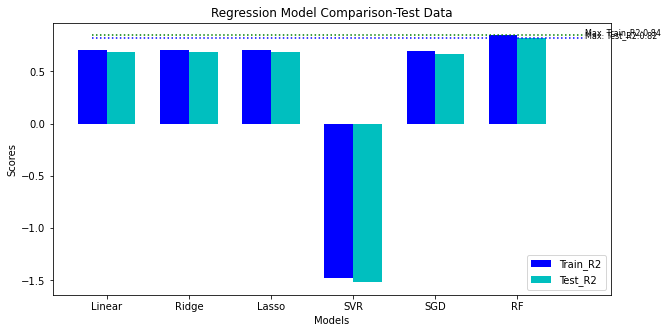

In [33]:
modelList = ['Linear','Ridge','Lasso','SVR','SGD','RF']
#Storage for model performance

ind = np.arange(len(modelList))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = plt.bar(ind, train_r2, width, color='b')
rects2 = plt.bar(ind + width, test_r2, width, color='c')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels((modelList))

plt.hlines(max(train_r2), 0, len(modelList), colors="g", linestyles='dotted')
ax.text(len(modelList), max(train_r2), 'Max. Train_R2:{:.2f}'.format(max(train_r2)), fontsize=8)
plt.hlines(max(test_r2), 0, len(modelList), colors="b", linestyles='dotted')
ax.text(len(modelList), max(test_r2), 'Max. Test_R2:{:.2f}'.format(max(test_r2)), fontsize=8)

ax.legend((rects1[0], rects2[0]), ('Train_R2', 'Test_R2'),loc='lower right')
plt.title("Regression Model Comparison-Test Data")
plt.xlabel("Models")
plt.ylabel("Scores")

#### Feature Importance: Random Forest Regressor

[3.08446947e-04 2.84292772e-03 3.09702908e-01 4.85068029e-03
 3.11077132e-04 8.68110960e-03 2.37645782e-04 3.90256830e-01
 1.71221389e-03 1.80655868e-02 7.20589804e-04 4.97605313e-03
 1.62640121e-01 6.01454165e-02 2.38659151e-04 4.18568467e-04
 1.59003708e-02 1.79907951e-02]
18


Text(0.5, 1.0, 'Visualized Feature Importance: Random Forest Regressor')

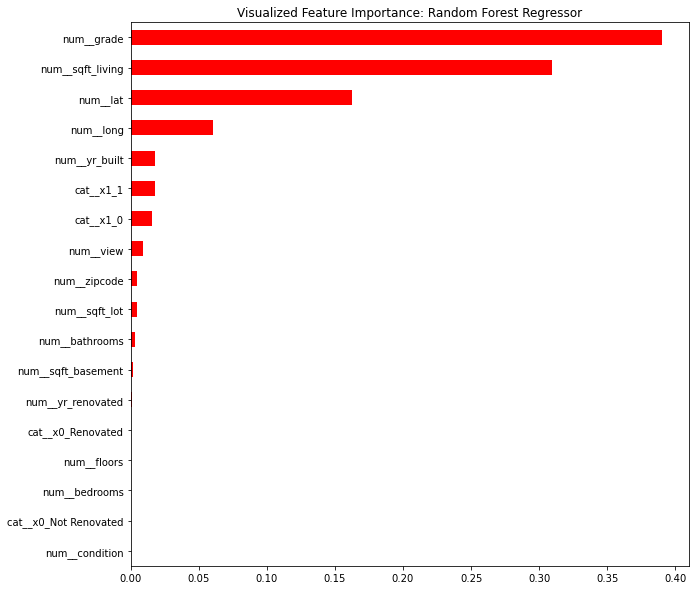

In [34]:
featModel = best_modelrfr.best_estimator_.named_steps["model"]
importance = featModel.feature_importances_
print(importance)
print(len(importance))
combination = pd.Series(importance,columns)
plt.figure(figsize=(10,10))
combination.sort_values().plot.barh(color='red')
plt.title("Visualized Feature Importance: {}".format('Random Forest Regressor'))

No handles with labels found to put in legend.


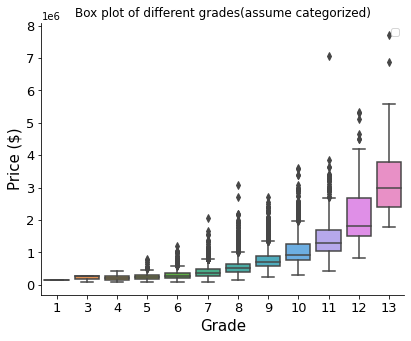

In [35]:
#Plotting the relationship between prices and grade

plt.figure(figsize=(6.5,5))
sns.boxplot(x='grade', y='price', data=housedf)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.title("Box plot of different grades(assume categorized)")

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#### Baseline-Score (Reference)

In [36]:
mean_price = y.mean()
print("mean price={}".format(mean_price))
ystupid = np.full(len(y),mean_price)
ystupid
print("R2 Score for stupid baseline is={}".format(r2_score(y,ystupid)))

mean price=540088.1417665294
R2 Score for stupid baseline is=0.0


## <span id="7"></span> 7. Model Selection: Random Forest Regressor Model
[Back to Main](#0)

- For the modelling pipeline, the initial approach is to bin the renovation year into categories and yet, to retain the numeric relationship for the houses which have renovated. This will provide more information to the model rather than just renovated/not renovated.
- To remove the affects of 0 year in year renovated, I have replaced it with the average of the column so that during standardscaling, these rows of data will not impact the feature bias.
- Based on the model performance and RMSE, we can see clearly that the best model is the random forest regressor model. 
- Interestingly, from the feature importance, despite all the feature engineering to the yr_renovated, it is seen that the derivatives from the feature variable are considered low in importance for prediction of the prices. Instead the grade of the houses are most important.
- From the boxplot, it seemed like the grades should be treated as ordinal categories and have been picked up well by the random forest regressor as seen by significant differences in prices with higher grades.
- It has the highest R2 score and the lowest RMSE scores in both test and train dataset.
- Across the board, other regression models behaves similarly, giving an approximate 0.70 R2-score. This might be because of the way the fitting is done that is fundamentally linear in nature. On the other hand, the random forest regressor model gives a slightly different and non-linear segmentation approch towards the regression which is more representative of the data.
- One particular note is the linearSVR regressor where the R2-scores are negative. This is suggestive that the model prediction params space is not suitable. 
- A possible option to add for prices would be to include datetimeobject as housing prices usually alters with time. Having to drop for this assignment meant possible missing information that could better predict the case.
